## 생존여부 예측모델 만들기
### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

(가) 제공 데이터 목록
- y_train: 생존여부(학습용)
- X_trian, X_test : 승객 정보 (학습용 및 평가용)

(나) 데이터 형식 및 내용
- y_trian (712명 데이터)

**시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임**

### 유의사항
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 accuracy로 평가함

csv 출력형태

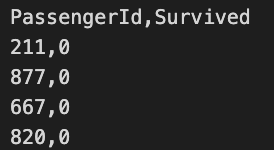

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/titanic/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [2]:
passengerId=X_test['PassengerId']

X_train.drop(columns='PassengerId',inplace=True)
X_test.drop(columns='PassengerId',inplace=True)
y_train.drop(columns='PassengerId',inplace=True)
y_test.drop(columns='PassengerId',inplace=True)

In [3]:
X_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         137
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       542
Embarked      1
dtype: int64

In [4]:
X_train['Age']=X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age']=X_test['Age'].fillna(X_test['Age'].mean())

In [5]:
X_train.drop(columns='Cabin',inplace=True)
X_test.drop(columns='Cabin',inplace=True)

In [6]:
X_train['Embarked']=X_train['Embarked'].fillna('S')
X_test['Embarked']=X_test['Embarked'].fillna('S')

In [7]:
X_train.drop(columns='Name',inplace=True)
X_test.drop(columns='Name',inplace=True)

In [8]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Ticket    712 non-null    object 
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


In [10]:
X_train['Sex']=X_train['Sex'].astype('category')
X_train['Embarked']=X_train['Embarked'].astype('category')
X_test['Sex']=X_test['Sex'].astype('category')
X_test['Embarked']=X_test['Embarked'].astype('category')

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    int64   
 1   Sex       712 non-null    category
 2   Age       712 non-null    float64 
 3   SibSp     712 non-null    int64   
 4   Parch     712 non-null    int64   
 5   Ticket    712 non-null    object  
 6   Fare      712 non-null    float64 
 7   Embarked  712 non-null    category
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 40.6+ KB


In [12]:
X_train.drop(columns='Ticket',inplace=True)
X_test.drop(columns='Ticket',inplace=True)

In [13]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [14]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
90,3,29.0,0,0,8.0500,0,1,0,0,1
103,3,33.0,0,0,8.6542,0,1,0,0,1
577,1,39.0,1,0,55.9000,1,0,0,0,1
215,1,31.0,1,0,113.2750,1,0,1,0,0
191,2,19.0,0,0,13.0000,0,1,0,0,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
value=['Age','Fare']
scaler=MinMaxScaler()
X_train[value]=scaler.fit_transform(X_train[value])
X_test[value]=scaler.fit_transform(X_test[value])

In [16]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
90,3,0.388421,0,0,0.015713,0,1,0,0,1
103,3,0.442783,0,0,0.016892,0,1,0,0,1
577,1,0.524327,1,0,0.109110,1,0,0,0,1
215,1,0.415602,1,0,0.221098,1,0,1,0,0
191,2,0.252514,0,0,0.025374,0,1,0,0,1


In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred1=model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred1))

0.7262569832402235


In [19]:
pd.DataFrame({'PassengerId':passengerId,'Survived':pred1}).to_csv('003000000.csv', index=False)

In [20]:
pd.read_csv('003000000.csv')

,PassengerId,Survived
0,211,0
1,877,0
2,667,0
3,820,0
4,737,0
...,...,...
174,495,0
175,872,1
176,531,1
177,158,0


## Start

In [21]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/titanic/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

## 라이브러리 및 데이터 불러오기

In [22]:
# 라이브러리 불러오기
import pandas as pd

In [23]:
# 데이터 불러오기 (생략)
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712, 2), (179, 11))

## EDA

In [24]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [25]:
# float64(2), int64(3), object(5)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [26]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [27]:
# 생존 비율
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

## 데이터 전처리

In [28]:
y = y_train["Survived"]

# sex만 원핫인코딩 됨
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])

In [29]:
X.shape, test.shape

((712, 5), (179, 5))

## 모델 및 평가

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=2021)
model.fit(X, y)
predictions = model.predict(test)

In [31]:
model.score(X, y)

0.8356741573033708

In [32]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0


In [33]:
# 수험번호.csv로 출력
output.to_csv('1234567.csv', index=False)

## 결과 체점 (수험자는 알 수 없는 부분임)

In [34]:
model.score(test, y_test['Survived'])

0.7318435754189944